In [27]:
import d6tflow
import pandas as pd
import math 

from adtpublish.portal.utils_rpt import df_style
from IPython.display import display, Markdown
from mako.template import Template
import matplotlib.pyplot as plt
import matplotlib.ticker as pltticker
import seaborn as sns
sns.set_style(style="whitegrid")
sns.set_style(style="white")
sns.set_palette("pastel")
def get_items_by_index(input_list, indices):
  return [input_list[i] for i in indices]
cfg_palette=get_items_by_index(sns.color_palette("pastel"),[0])

import cfg, tasks_crystal

In [28]:
params=dict(uni='sectors',freq='Q',idx='SPY')
params['strategy']='lo'
params['strategy']='ls'
task=tasks_crystal.PX
task=tasks_crystal.VizSummaryReturns

task=tasks_crystal.VizSummaryReturns

In [29]:
flow = d6tflow.Workflow(task=task, params=params)
# flow.reset(tasks.PX)
flow.run()


===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 VizSummaryReturns(uni=sectors, idx=SPY, freq=Q, strategy=ls)

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



LuigiRunResult(status=<LuigiStatusCode.SUCCESS: (':)', 'there were no failed tasks or missing dependencies')>,worker=<luigi.worker.Worker object at 0x0000020C8682B710>,scheduling_succeeded=True)

In [30]:
df_pxidx,df_signal,dfo_strat = flow.outputLoad(tasks_crystal.VizSummaryReturns)
dfr_signal = flow.outputLoad(tasks_crystal.TradeSignal)
cfg_meta = flow.outputLoadMeta(tasks_crystal.VizSummaryReturns)
dfr_signal = flow.outputLoad(tasks_crystal.TradeSignal)
cfg_ann_factor = cfg_meta['cfg_ann_factor']
idxLO = cfg_meta['idxLO']
npers = cfg_meta['npers']
df_pxetf = flow.outputLoad(tasks_crystal.PXETF)

In [31]:
cfg_col_sel = ['symbol','date','adjClose']
dfo_etfs = df_pxetf[cfg_col_sel].merge(df_pxidx[cfg_col_sel])

In [32]:
dfg_strat = dfo_strat.rename({'lo':'Long Only','ls':'Long Short','idx':params['idx']})
dfd_strat = dfo_strat.to_dict(orient='index')

In [33]:
dfo_rtn_rank = dfr_signal.groupby('rank')['rtn_fwd1'].mean()
dfo_rtn_rank2 = df_signal.groupby('rank')['rtn_fwd1'].mean()
dfo_sharpe_rank = dfr_signal.groupby('rank')['rtn_fwd1'].agg(lambda x: (x.mean()*cfg_ann_factor)/(x.std()*math.sqrt(cfg_ann_factor)))
dfo_rank_sector = dfr_signal.groupby('symbol')['rank'].mean().sort_values()


# Up for Grabs! 49% Investment Alpha Annually with Sector Rotation

Is it worth paying attention when investors and financial news discuss sector trends and performance? Is tactical asset allocation a profitable investment strategy? Absolutely! With a tactical sector rotation strategy, you have the potential to significantly outperform the market and generate 49% annual returns!



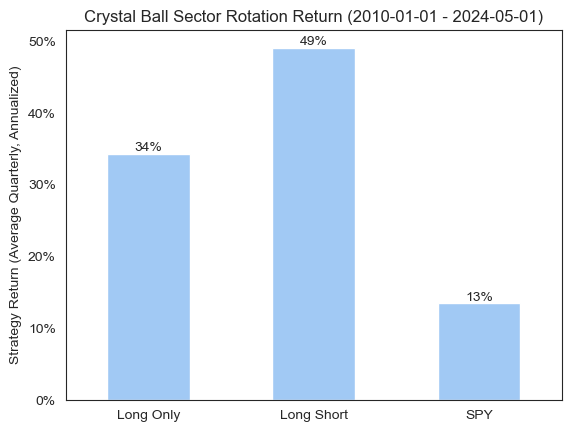

In [34]:
text = f'''
# Up for Grabs! {dfd_strat['ls']['rtn']:.0%} Investment Alpha Annually with Sector Rotation

Is it worth paying attention when investors and financial news discuss sector trends and performance? Is tactical asset allocation a profitable investment strategy? Absolutely! With a tactical sector rotation strategy, you have the potential to significantly outperform the market and generate {dfd_strat['ls']['rtn']:.0%} annual returns!

'''
display(Markdown(text))

g = dfg_strat[['rtn']].plot.bar(legend=None, rot=0)
g.set(title=f'Crystal Ball Sector Rotation Return ({cfg.dt_start} - {cfg.dt_end})', ylabel=f'Strategy Return (Average Quarterly, Annualized)', xlabel=None)
g.yaxis.set_major_formatter(pltticker.FuncFormatter(lambda x, pos: f"{x:.0%}"))
for container in g.containers:
    g.bar_label(container, fmt='{:,.0%}')

In [50]:
text = f'''
## Sector ETFs: Signal or Noise?

Investors and financial news often discuss sector trends and monitor sector performance. For example, on the financial analysis platform [koyfin](https://koyfin.com/) (which is a great Bloomberg terminal replacement btw!), the US Equity Sectors monitor is one of the first things you see. We wondered if this is just noise and best ignored or an important signal you should be watching? How much alpha can you generate and if so, how should you do it? Read on to find out!

![koyfin US Equity Sectors monitor](https://s3.us-east-1.amazonaws.com/www.acadiadata.net/img-reports/screenshot-koyfin-sectors.PNG)

## Trade Sectors with a TAA Sector Rotation Strategy

For those unfamiliar with the topic, tactical asset allocation (TAA) strategies aim to take advantage of sector trends. A tactical asset allocation strategy is an investment approach that actively adjusts the allocation of assets in a portfolio to take advantage of market opportunities or to protect against potential market downturns. Unlike strategic asset allocation, which maintains a long-term, fixed asset mix based on an investor's risk tolerance, goals, and time horizon, TAA involves short- to medium-term adjustments to asset weights based on market conditions, economic trends, and other factors.

One tactical approach to managing a portfolio is an ETF sector rotation investment strategy that involves shifting investments between different sectors of the economy at various times to capitalize on changing economic cycles and market conditions. The goal is to improve portfolio performance by investing in sectors expected to outperform and reducing exposure to those expected to underperform. For more details see [Fidelity An introduction to sector rotation strategies](https://www.fidelity.com/learning-center/trading-investing/markets-sectors/intro-sector-rotation-strats).

![Fidelity sector rotation framework](https://www.fidelity.com/bin-public/600_Fidelity_Com_English/images/migration/Equity%20sector%20relative%20performance%202023%20update.png)

'''
display(Markdown(text))


## Sector ETFs: Signal or Noise?

Investors and financial news often discuss sector trends and monitor sector performance. For example, on the financial analysis platform [koyfin](https://koyfin.com/) (which is a great Bloomberg terminal replacement btw!), the US Equity Sectors monitor is one of the first things you see. We wondered if this is just noise and best ignored or an important signal you should be watching? How much alpha can you generate and if so, how should you do it? Read on to find out!

![koyfin US Equity Sectors monitor](https://s3.us-east-1.amazonaws.com/www.acadiadata.net/img-reports/screenshot-koyfin-sectors.PNG)

## Trade Sectors with a TAA Sector Rotation Strategy

For those unfamiliar with the topic, tactical asset allocation (TAA) strategies aim to take advantage of sector trends. A tactical asset allocation strategy is an investment approach that actively adjusts the allocation of assets in a portfolio to take advantage of market opportunities or to protect against potential market downturns. Unlike strategic asset allocation, which maintains a long-term, fixed asset mix based on an investor's risk tolerance, goals, and time horizon, TAA involves short- to medium-term adjustments to asset weights based on market conditions, economic trends, and other factors.

One tactical approach to managing a portfolio is an ETF sector rotation investment strategy that involves shifting investments between different sectors of the economy at various times to capitalize on changing economic cycles and market conditions. The goal is to improve portfolio performance by investing in sectors expected to outperform and reducing exposure to those expected to underperform. For more details see [Fidelity An introduction to sector rotation strategies](https://www.fidelity.com/learning-center/trading-investing/markets-sectors/intro-sector-rotation-strats).

![Fidelity sector rotation framework](https://www.fidelity.com/bin-public/600_Fidelity_Com_English/images/migration/Equity%20sector%20relative%20performance%202023%20update.png)




## Sector Rotation Alpha Potential: 21% Long-Only and 49% Long/Short

To determine if sector rotation investment strategies can beat market returns, we ran a "crystal ball" backtest, which assumes perfect foresight into sector performance. While not implementable in practice, this method provides a data-driven answer to the viability of sector rotation.

To conduct the crystal ball backtest, we took 11 US large cap sector ETFs and we assumed that at the beginning of the quarter you know the top and bottom 3 sectors for rest of this quarter. You then buy/sell them in equal weights. In other words, the long-only strategy is always 100% invested in the top 3 performing sector ETFs while the long/short strategy is always 100% long the top 3 sectors and 100% short the bottom 3 sectors (200% gross). The backtest covers the period from 2010-01-01 to 2024-05-01.

The graph summarizes the crystal ball strategy returns over this period (equal weight quarterly returns averaged over the backtest period, annualized). The simple buy-and-hold strategy yielded a 13% return, while the crystal ball sector rotation long-only strategy generated 34% returns (21% above the benchmark). The long/short strategy achieved a remarkable 49% return. Clearly, paying attention to sector trends and news is worthwhile!



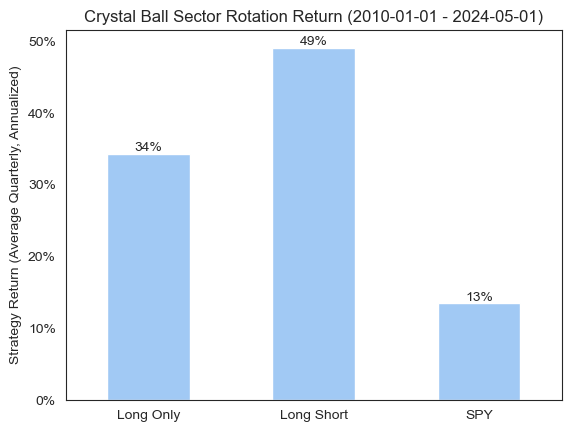

In [36]:
text = f'''
## Sector Rotation Alpha Potential: {(dfd_strat['lo']['rtn']-dfd_strat['idx']['rtn']):.0%} Long-Only and {dfd_strat['ls']['rtn']:.0%} Long/Short

To determine if sector rotation investment strategies can beat market returns, we ran a "crystal ball" backtest, which assumes perfect foresight into sector performance. While not implementable in practice, this method provides a data-driven answer to the viability of sector rotation.

To conduct the crystal ball backtest, we took {len(cfg.tickers_sector)} US large cap sector ETFs and we assumed that at the beginning of the quarter you know the top and bottom 3 sectors for rest of this quarter. You then buy/sell them in equal weights. In other words, the long-only strategy is always 100% invested in the top 3 performing sector ETFs while the long/short strategy is always 100% long the top 3 sectors and 100% short the bottom 3 sectors (200% gross). The backtest covers the period from {cfg.dt_start} to {cfg.dt_end}.

The graph summarizes the crystal ball strategy returns over this period (equal weight quarterly returns averaged over the backtest period, annualized). The simple buy-and-hold strategy yielded a {dfd_strat['idx']['rtn']:.0%} return, while the crystal ball sector rotation long-only strategy generated {dfd_strat['lo']['rtn']:.0%} returns ({(dfd_strat['lo']['rtn']-dfd_strat['idx']['rtn']):.0%} above the benchmark). The long/short strategy achieved a remarkable {dfd_strat['ls']['rtn']:.0%} return. Clearly, paying attention to sector trends and news is worthwhile!

'''
display(Markdown(text))

g = dfg_strat[['rtn']].plot.bar(legend=None, rot=0)
g.set(title=f'Crystal Ball Sector Rotation Return ({cfg.dt_start} - {cfg.dt_end})', ylabel=f'Strategy Return (Average Quarterly, Annualized)', xlabel=None)
g.yaxis.set_major_formatter(pltticker.FuncFormatter(lambda x, pos: f"{x:.0%}"))
for container in g.containers:
    g.bar_label(container, fmt='{:,.0%}')
    plt.show();

In [37]:
text = f'''
The table below provides additional strategy performance details. Sharpe Ratios are {dfd_strat['lo']['sharpe']:.1f} for long-only and {dfd_strat['ls']['sharpe']:.1f}, both significantly higher than buy-and-hold with {dfd_strat['idx']['sharpe']:.1f} Sharpe. Hit rates for both strategies are also very high and better than buy-and-hold.

'''
display(Markdown(text))

cfg_col_rename = {'rtn':'Return Annualized','sharpe':'Return / Vol','hit':'% Positive'}
cfg_col_format = {'{:.1%}': ['rtn'],'{:.1f}': ['sharpe'],'{:.0%}': ['hit']}
df_style(dfo_strat,col_rename=cfg_col_rename,col_sel='all',col_format=cfg_col_format)


The table below provides additional strategy performance details. Sharpe Ratios are 2.3 for long-only and 5.1, both significantly higher than buy-and-hold with 0.9 Sharpe. Hit rates for both strategies are also very high and better than buy-and-hold.



In [38]:
dfp = (df_signal.groupby('date')['rtn_trade'].agg(lambda x: x.sum()).rolling(4).mean()*cfg_ann_factor)


## Alpha is Consistent: Returns Higher than 40% for 80% of the Time

We established that sector rotation has alpha potential and paying attention to sector trends and news is worthwhile. Now the next question is: should you always be paying attention or only during certain periods eg during a crisis?

The chart below demonstrates that sector rotation long/short alpha is very consistent. The strategy typically makes 49% and while it generates higher returns during volatile periods (covid 2020, rate hikes/inflation 2022, EU financial crisis 2011), it typically generates annualized returns higher than 40% for 80% of the time.

So you should always be paying attention to sector performance. But especially during volatile periods when sector return dispersion is high.



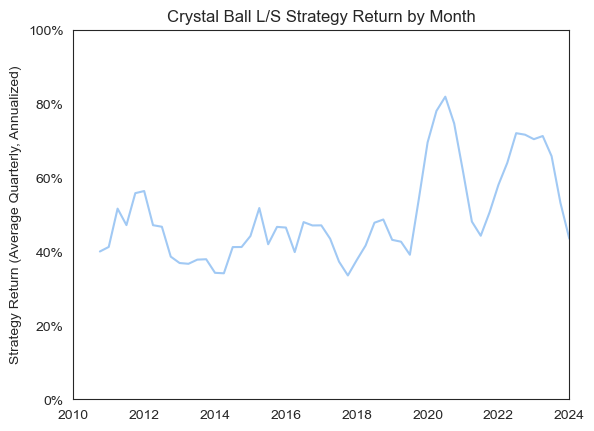

In [39]:
text = f'''
## Alpha is Consistent: Returns Higher than {dfp.quantile(0.2):.0%} for 80% of the Time

We established that sector rotation has alpha potential and paying attention to sector trends and news is worthwhile. Now the next question is: should you always be paying attention or only during certain periods eg during a crisis?

The chart below demonstrates that sector rotation long/short alpha is very consistent. The strategy typically makes {dfd_strat['ls']['rtn']:.0%} and while it generates higher returns during volatile periods (covid 2020, rate hikes/inflation 2022, EU financial crisis 2011), it typically generates annualized returns higher than {dfp.quantile(0.2):.0%} for 80% of the time.

So you should always be paying attention to sector performance. But especially during volatile periods when sector return dispersion is high.

'''
display(Markdown(text))

g = dfp.plot.line(ylim=(0,1.0))
g.set(title=f'Crystal Ball L/S Strategy Return by Month', ylabel=f'Strategy Return (Average Quarterly, Annualized)', xlabel=None)
g.yaxis.set_major_formatter(pltticker.FuncFormatter(lambda x, pos: f"{x:.0%}"))

In [40]:
# return drivers
dfp_rtn_sector = df_signal.groupby(['symbol','trade_status'])['rtn_trade'].sum().unstack()
dfp_rtn_sector['ls']=dfp_rtn_sector[['long','short']].sum(axis=1)
dfp_rtn_sector = dfp_rtn_sector.sort_values('ls',ascending=False)

# portfolio allocation
dfp_pct_trade = dfr_signal.groupby(['symbol','trade_status']).size().unstack()/npers
dfp_pct_trade['traded']=dfp_pct_trade[['long','short']].sum(axis=1)
dfp_pct_trade = dfp_pct_trade.sort_values(['traded'],ascending=False)


## Alpha driven by XLE, XLK, XLY

Great, so which sectors should you be paying attention to? The chart below breaks down the overall returns into the 10 sector ETFs.

Energy (XLE) was by far the sector that contributed most to returns, equally on the long and short side. Technology (XLK), Consumer Discretionary (XLY) are the second and third largest contributors that mostly contributed to returns on the long side. On the short side most other sectors contributed similar returns but Communications (VOX) and Real Estate (VNQ) were the second and third largest contributors.



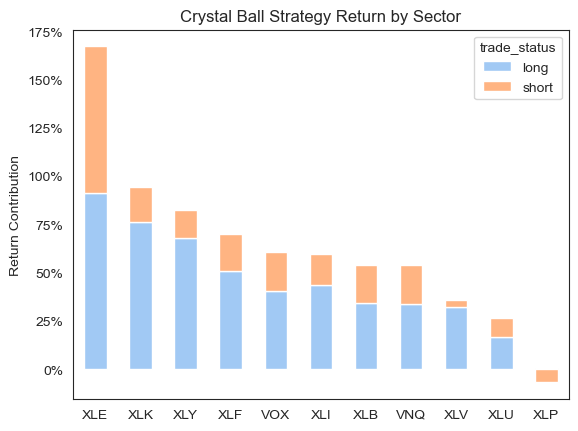

In [41]:
text = f'''
## Alpha driven by {', '.join(dfp_rtn_sector.index[:3])}

Great, so which sectors should you be paying attention to? The chart below breaks down the overall returns into the 10 sector ETFs.

Energy (XLE) was by far the sector that contributed most to returns, equally on the long and short side. Technology (XLK), Consumer Discretionary (XLY) are the second and third largest contributors that mostly contributed to returns on the long side. On the short side most other sectors contributed similar returns but Communications (VOX) and Real Estate (VNQ) were the second and third largest contributors.

'''
display(Markdown(text))

g = dfp_rtn_sector[['long','short']].plot.bar(stacked=True, rot=0)
g.set(title=f'Crystal Ball Strategy Return by Sector', ylabel=f'Return Contribution', xlabel=None)
g.yaxis.set_major_formatter(pltticker.FuncFormatter(lambda x, pos: f"{x:.0%}"))

Just for comparison here is the buy-and-hold sector performance.

In [42]:
df_px = flow.outputLoad(tasks_crystal.PX)

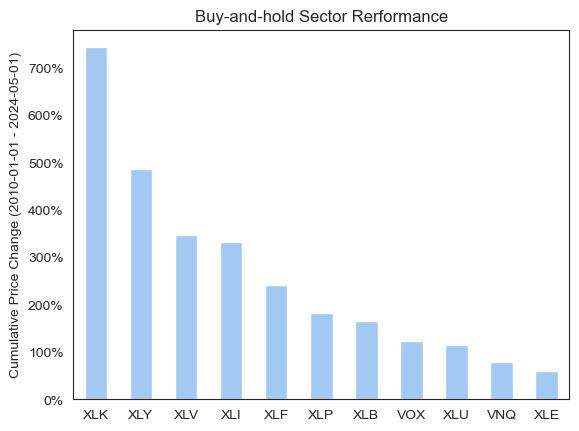

In [43]:
g = df_px.groupby('symbol')['vwap'].agg(lambda x: x.values[-1]/x.values[0]-1).sort_values(ascending=False).plot.bar(rot=0)
g.set(title=f'Buy-and-hold Sector Rerformance', ylabel=f'Cumulative Price Change ({cfg.dt_start} - {cfg.dt_end})', xlabel=None)
g.yaxis.set_major_formatter(pltticker.FuncFormatter(lambda x, pos: f"{x:.0%}"))


## How to Trade the Sector ETFs?

Lets look at which sectors the crystal ball most frequently traded. The chart below shows the % of times the sector ETF was included in the portfolio.

XLE was most frequently traded both long and short. XLU and VNQ were frequently traded but mostly as short hedges as they didn't contribute much to returns. XLK and XLY were often in the long portfolio. 


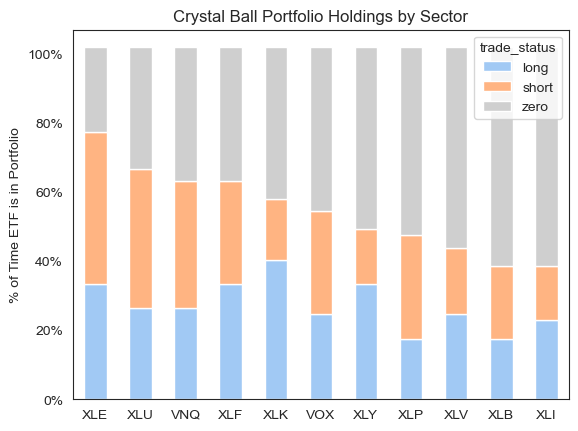

In [44]:
text = f'''
## How to Trade the Sector ETFs?

Lets look at which sectors the crystal ball most frequently traded. The chart below shows the % of times the sector ETF was included in the portfolio.

XLE was most frequently traded both long and short. XLU and VNQ were frequently traded but mostly as short hedges as they didn't contribute much to returns. XLK and XLY were often in the long portfolio. 
'''
display(Markdown(text))

g = dfp_pct_trade[['long','short','zero']].plot.bar(stacked=True, rot=0, color=get_items_by_index(sns.color_palette("pastel"),[0,1,7]))
g.set(title=f'Crystal Ball Portfolio Holdings by Sector', ylabel=f'% of Time ETF is in Portfolio', xlabel=None)
g.yaxis.set_major_formatter(pltticker.FuncFormatter(lambda x, pos: f"{x:.0%}"))

#### Portfolio Holding Details by sector

The charts below show the holdings for each sector over time. Interestingly sectors that are usually considered "low beta, non-cyclical" were not necessarily traded when typical sector rotation frameworks tell you to do so. We will write more about that in the follow-up.

'carousel-start'


#### Portfolio Weights for XLE 


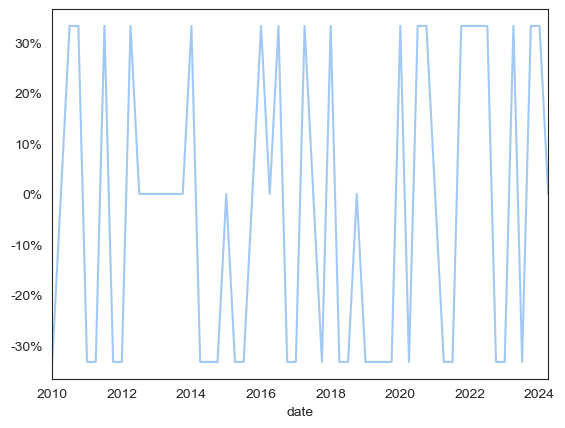

'carousel-next'


#### Portfolio Weights for XLU 


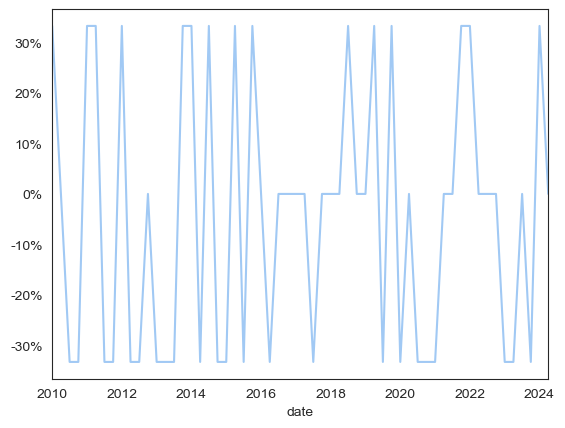

'carousel-next'


#### Portfolio Weights for VNQ 


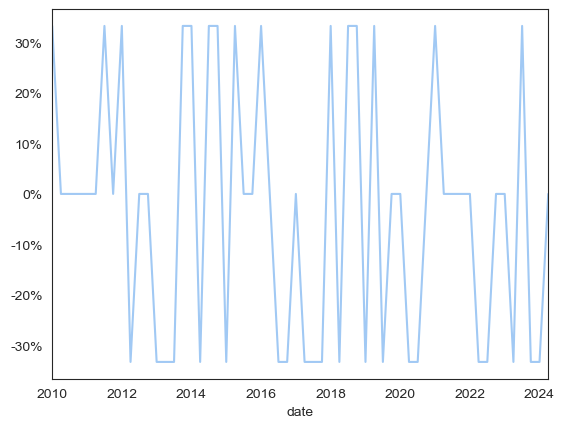

'carousel-next'


#### Portfolio Weights for XLF 


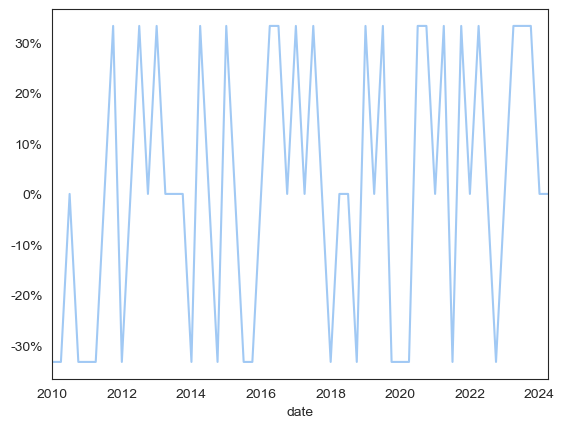

'carousel-next'


#### Portfolio Weights for XLK 


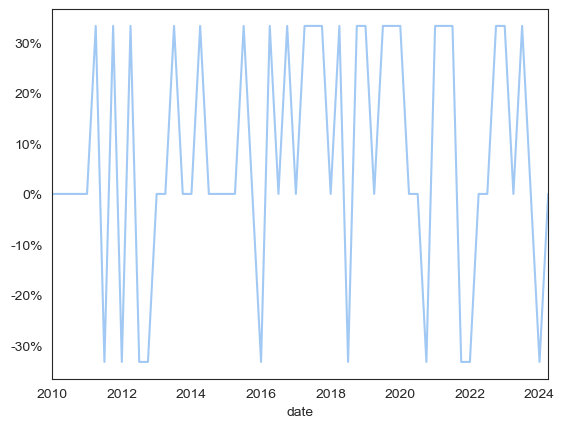

'carousel-next'


#### Portfolio Weights for VOX 


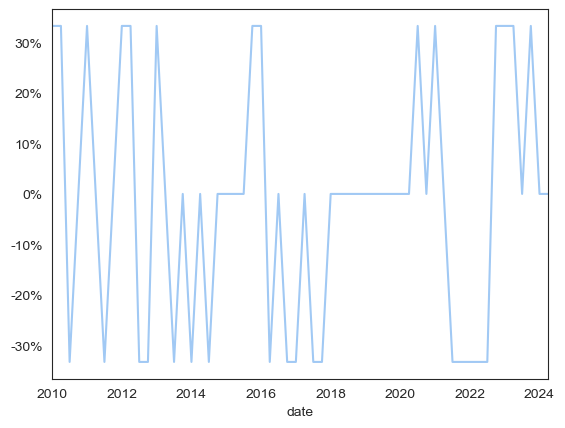

'carousel-next'


#### Portfolio Weights for XLY 


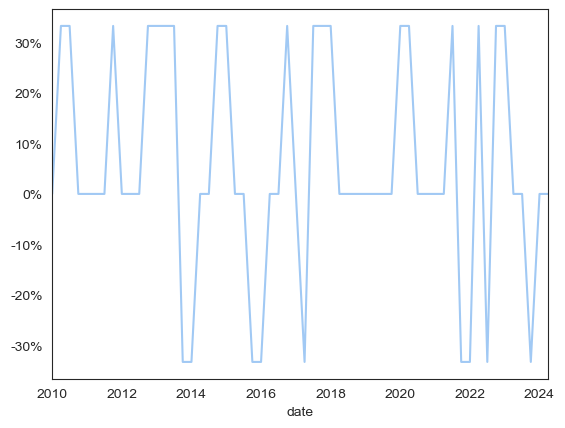

'carousel-next'


#### Portfolio Weights for XLP 


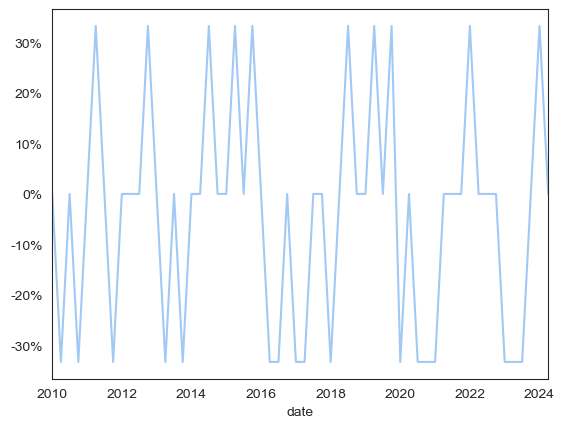

'carousel-next'


#### Portfolio Weights for XLV 


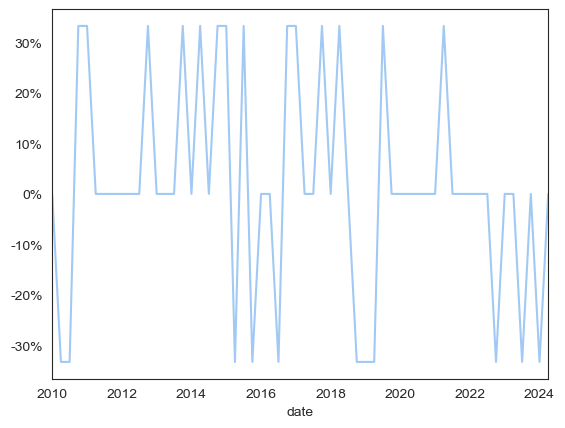

'carousel-next'


#### Portfolio Weights for XLB 


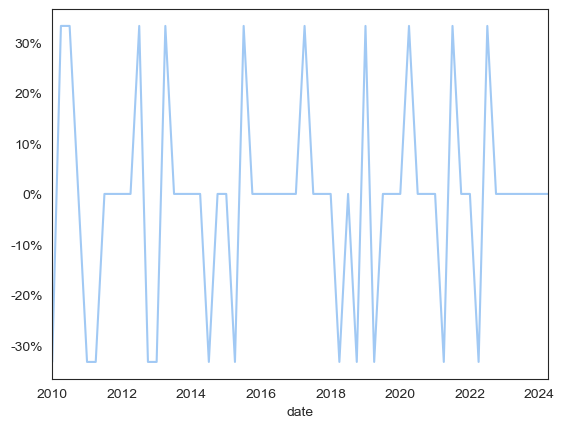

'carousel-next'


#### Portfolio Weights for XLI 


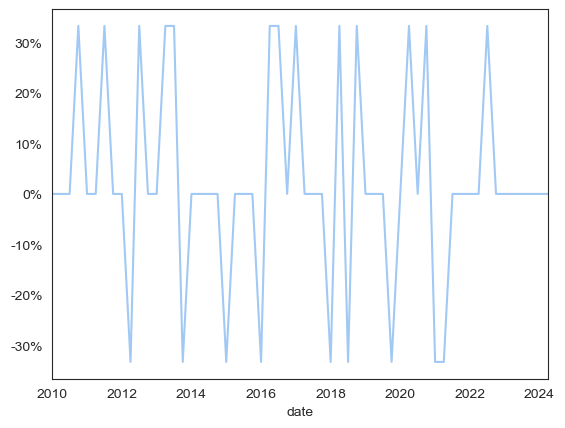

'carousel-next'

In [52]:
display("carousel-start")

for isymbol in dfp_pct_trade.index:
    text = f'''
#### Portfolio Weights for {isymbol} 
'''
    display(Markdown(text))

    g = dfr_signal[dfr_signal['symbol']==isymbol].set_index('date')['wgt'].fillna(0).plot.line()
    g.yaxis.set_major_formatter(pltticker.FuncFormatter(lambda x, pos: f"{x:.0%}"))
    plt.show()

    display("carousel-next")

## Existing Sector Rotation ETFs are underperforming

As mentioned the crystal ball strategy can't actually be traded because you don't know the sector performance ahead of time. We found two sector rotation ETFs that you can actually buy and checked their performance. Both are active ETFs that were only recently issued. Unfortunately both of them were unable to capture the alpha potential and underperformed the market over that short period.

Lets see if we can do better with ML!

In [46]:
# sector rotation etfs

dfo_etfs = df_pxetf[df_pxetf['date'].dt.year>=2021].pivot(index='date',columns='symbol',values='adjClose')
dfo_etfs = dfo_etfs.reset_index().merge(df_pxidx.pivot(index='date',columns='symbol',values='adjClose'), on='date')
dfo_etfs = dfo_etfs.resample(params['freq'], on='date').last()
dfp_etfs= dfo_etfs.pct_change().mean()*cfg_ann_factor

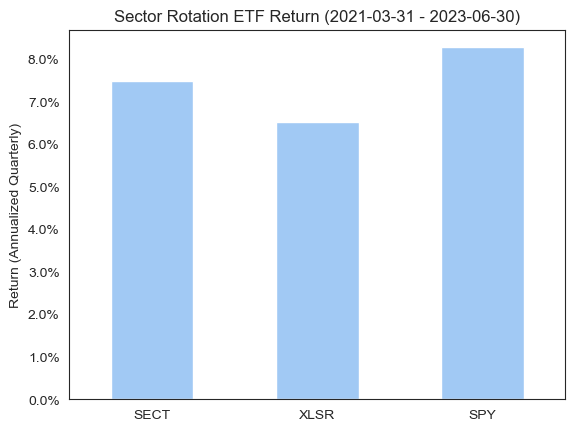

In [47]:
g = dfp_etfs.plot.bar(rot=0)
g.set(title=f'Sector Rotation ETF Return ({dfo_etfs.index.date.min()} - {dfo_etfs.index.date.max()})', ylabel=f'Return (Annualized Quarterly)', xlabel=None);
g.yaxis.set_major_formatter(pltticker.FuncFormatter(lambda x, pos: f"{x:.1%}"))

In [48]:
text = f'''
## So now what?

We established that sector rotation is a profitable strategy and worth paying attention to. The crystal ball sector rotation long-only strategy generated {dfd_strat['lo']['rtn']:.0%} returns ({(dfd_strat['lo']['rtn']-dfd_strat['idx']['rtn']):.0%} above the benchmark). The long/short strategy achieved a remarkable {dfd_strat['ls']['rtn']:.0%} return. Sharpe Ratios are {dfd_strat['lo']['sharpe']:.1f} for long-only and {dfd_strat['ls']['sharpe']:.1f}, both significantly higher than buy-and-hold with {dfd_strat['idx']['sharpe']:.1f} Sharpe. 

This now gives us the motivation to build a predictive model which would enable us to actually implement the strategy and capture the alpha potential. And it gives us a frame of reference to check if sector allocation frameworks capture all that alpha potential. Follow us to receive further updates!

'''
display(Markdown(text))


## So now what?

We established that sector rotation is a profitable strategy and worth paying attention to. The crystal ball sector rotation long-only strategy generated 34% returns (21% above the benchmark). The long/short strategy achieved a remarkable 49% return. Sharpe Ratios are 2.3 for long-only and 5.1, both significantly higher than buy-and-hold with 0.9 Sharpe. 

This now gives us the motivation to build a predictive model which would enable us to actually implement the strategy and capture the alpha potential. And it gives us a frame of reference to check if sector allocation frameworks capture all that alpha potential. Follow us to receive further updates!



In [49]:
import adtpublish.utils
adtpublish.utils.display_meta({'entities':cfg.tickers_sector})